# Analyze eatrhquake data 

The notebook helps explore and analyze earthquake data. This includes loading data in `pandas` data frame and displaying graphs using `matplotlib` library. We'll go through below steps: 

## Table of contents
1. [Get data](#data_set)

2. [Load data](#load_data)

3. [Access data](#access_data)

4. [Explore data](#explore_data)

5. [Plot the results](#plot_data)

6. [Download the notebook](#download)

7. [Summary](#summary)


<a id="data_set"></a> 
## 1. Get data
In this notebook, we will explore and analyze earthquake data from all over the world when earchwuakes were noted on a Richter scale of 2.5 or higer.

The raw precipitation data set is from [USGS](http://earthquake.usgs.gov/earthquakes/search/), a website for which provides earchwuale data for analyses.

To get the earthquake data set:
1. Click [USGS](http://earthquake.usgs.gov/earthquakes/search/).   
2. Select Magnitude, date and Geographic Region details.
3. Hit the Search buttn to save the CSV to your machine.



<a id="load_data"></a>
## 2. Load data
You can add the CSV file that you downloaded to this notebook by dragging the file to the **Data Source** pane in the notebook **Palette** in the notebook. 
The data file is listed on the **Data Source** pane and is saved in the Object Storage instance associated with your Analytics for Apache Spark service.
The progress bar below the file in the **Data Source** panel indicates the status of the load process. In the next step, you will learn how to access files in Object Storage.

<a id="access_data"></a> 
## 3. Access data 

**[pandas](http://pandas.pydata.org/)** is a useful Python package for managing structured data.  The two primary data structures of pandas are [`Series`](http://pandas-docs.github.io/pandas-docs-travis/dsintro.html#series) (1-dimensional) and [`DataFrame`](http://pandas-docs.github.io/pandas-docs-travis/dsintro.html#dataframe) (2-dimensional).

In the following steps, you will load the `precipitation.csv` file into a DataFrame in memory.

To run code cells in a notebook, click Run Cell (**&#9658;**) in the notebook toolbar.  While the code in the cell is running, a `[*]` appears next to the cell. After the code has run, the `[*]` is replaced by a number indicating that the code cell is the *N*th cell to run in the notebook.

In [12]:
import requests, StringIO, pandas as pd, json, re

###  Access Object Storage

Because the `eq.csv` file is located in Object Storage, you need to define a helper function to access the data file that you loaded. Run the following cell to define the method `get_file_content()`:

In [23]:
def get_file_content(credentials):
    """For given credentials, this functions returns a StringIO object containing the file content."""
    
    url1 = ''.join([credentials['auth_url'], '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()    
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                if(e2['interface']=='public'and e2['region']==credentials['region']):
                    url2 = ''.join([e2['url'],'/', credentials['container'], '/', credentials['filename']])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO.StringIO(resp2.content)

### Insert data source credentials

To add the credentials to access the `precipitation.csv` file which is stored in Object Storage, click the next code cell and select the `Insert to code` function below the data file in the **Data Source** pane in the notebook palette.

The credentials for accessing the `precipitation.csv` file are added to the cell as a Python dictionary. With these credentials, you can use the helper function to load the data file into a `pandas.DataFrame`. 

**Note**: When you select the `Insert to code` function, a code cell with a dictionary is created for you.  Adjust the credentials in the Python dictionary to correspond with the credentials inserted by the `Insert to code` function and run the dictionary code cell. The access credentials to the Object Storage instance in the dictionary are provided for convenience for later usage. 

In [24]:
credentials_2 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_41f1070d_fa61_404e_b265_7d781be12baa',
  'project_id':'78a47228e2b4426fbea2b45d8b8aa251',
  'region':'dallas',
  'user_id':'22bc4cbc5f944fc8a2b2a923c3d2ecf1',
  'domain_id':'87c803acc1ec4e2b9bdd3ebdd1985070',
  'domain_name':'1137929',
  'username':'admin_d383b654798c1d12cc25831aa441deafb53932ad',
  'password':"""Tc=3I3lBPngASO~T""",
  'filename':'eq.csv',
  'container':'notebooks',
  'tenantId':'sd94-1c59561b715ce4-09a5d9fc31f5'
}

### Load data into `pandas DataFrame`

Run the next cell to load the data into a pandas DataFrame: 

In [25]:
content_string = get_file_content(credentials_2)
eq_df = pd.read_csv(content_string)

<a id="explore_data"></a> 
## 4. Explore data

Now that your data is in memory, you can begin to explore and manipulate it.

Show the first five and the last five rows of the data by using the `head()` and `tail()` methods.  Run each code cell:

In [26]:
eq_df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-10-12T17:55:00.830Z,19.1670,-155.537994,0.65,2.65,ml,52,90.0,0.072650,0.34,...,2016-10-12T18:00:43.100Z,"7km SW of Pahala, Hawaii",earthquake,0.43,0.21,0.230,12,automatic,hv,hv
1,2016-10-12T14:11:21.000Z,63.5892,-147.704400,1.40,3.00,ml,NaN,NaN,NaN,0.82,...,2016-10-12T15:08:36.810Z,"65km ENE of Cantwell, Alaska",earthquake,0.30,0.30,NaN,NaN,automatic,ak,ak
2,2016-10-12T10:39:23.000Z,18.9745,-64.438500,14.00,2.60,Mb,6,316.8,0.579413,0.18,...,2016-10-12T12:29:46.735Z,"64km NNE of Road Town, British Virgin Islands",earthquake,2.00,2.50,0.000,5,reviewed,pr,pr
3,2016-10-12T10:39:15.770Z,10.7260,144.775200,21.06,5.10,mb,NaN,50.0,2.847000,0.99,...,2016-10-12T10:55:58.040Z,"238km N of Faraulep, Micronesia",earthquake,6.40,5.70,0.059,92,reviewed,us,us
4,2016-10-12T08:24:47.120Z,51.3739,-177.535800,54.77,4.30,mb,NaN,188.0,0.535000,1.21,...,2016-10-12T08:42:59.040Z,"70km SE of Tanaga Volcano, Alaska",earthquake,8.40,6.10,0.066,66,reviewed,us,us


In [27]:
eq_df.tail(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
1231,2016-09-13T05:54:03.200Z,38.609833,-112.563667,4.11,2.6,ml,24,61,0.09125,0.17,...,2016-09-13T15:45:54.210Z,"37km N of Beaver, Utah",earthquake,0.47,1.39,0.173,18,reviewed,uu,uu
1232,2016-09-13T02:15:21.380Z,36.246500,-98.423800,5.00,3.4,mb_lg,NaN,44,0.24000,0.66,...,2016-09-13T16:10:28.205Z,"5km ESE of Fairview, Oklahoma",earthquake,0.90,2.00,0.124,17,reviewed,us,us
1233,2016-09-13T02:05:48.280Z,36.240500,-98.432200,5.00,3.6,mb_lg,NaN,44,0.23700,0.56,...,2016-09-13T16:12:09.500Z,"5km SE of Fairview, Oklahoma",earthquake,1.30,1.00,0.052,96,reviewed,us,us
1234,2016-09-13T00:07:21.950Z,-28.756400,61.406900,10.00,4.3,mb,NaN,172,9.13400,0.30,...,2016-10-02T02:43:01.040Z,Southwest Indian Ridge,earthquake,15.00,2.00,0.267,4,reviewed,us,us
1235,2016-09-13T00:02:19.580Z,-17.844000,-177.883700,601.88,4.0,mb,NaN,106,3.87200,0.63,...,2016-10-02T02:25:51.040Z,Fiji region,earthquake,15.10,9.60,0.134,15,reviewed,us,us


Each row in the table lists:

* Earthquake time 
* Type of earthquake, magnitude, depth, area, and other details.

By using the `DataFrame` API, we can list all the magnitude types

In [29]:
eq_df['magType'].values

array(['ml', 'ml', 'Mb', ..., 'mb_lg', 'mb', 'mb'], dtype=object)

We can quickly analyse data using pivot table utility. Here, we'll group and count the earthquakes as per magnitude type.

In [37]:
eq_df.pivot_table(index="magType", aggfunc=len, values="time")

magType
Mb         1
Md       148
mb       531
mb_lg     65
md        19
ml       410
ms_20      1
mw        10
mwb        6
mwp        4
mwr       26
mww       15
Name: time, dtype: int64

In [105]:
# pv1 is the table which shows the relation between location sources and the type of earthquakes which have occured there
pv1 = eq_df.pivot_table(index="locationSource", columns="magType", aggfunc=len, values = "time")
pv1

magType,Mb,Md,mb,mb_lg,md,ml,ms_20,mw,mwb,mwp,mwr,mww
locationSource,,,,,,,,,,,,
ak,NaN,NaN,NaN,NaN,NaN,221,NaN,NaN,NaN,NaN,NaN,NaN
car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
ci,NaN,NaN,NaN,NaN,NaN,71,NaN,7,NaN,NaN,NaN,NaN
guc,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
hv,NaN,NaN,NaN,NaN,3,14,NaN,NaN,NaN,NaN,NaN,NaN
isk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
ismp,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
ld,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
ldg,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


From the above table we can get information which type of earthquakes are most common. This will be determined by the count of each column above.


In [116]:
pv2 = pv1.count()
pv2

magType
Mb        1
Md        1
mb        4
mb_lg     2
md        3
ml       16
ms_20     1
mw        2
mwb       1
mwp       1
mwr       3
mww       1
dtype: int64

Similarly we can see the other parameters which can lead to interesting results. For each row, we can also get the range of data using `describe()` function

In [115]:
pv1.describe()

magType,Mb,Md,mb,mb_lg,md,ml,ms_20,mw,mwb,mwp,mwr,mww
count,1,1,4.000000,2.000000,3.000000,16.000000,1,2.000000,1,1,3.000000,1
mean,1,148,132.750000,32.500000,6.333333,25.625000,1,5.000000,6,4,8.666667,15
std,NaN,NaN,260.177343,44.547727,7.571878,55.202506,NaN,2.828427,NaN,NaN,13.279056,NaN
min,1,148,1.000000,1.000000,1.000000,1.000000,1,3.000000,6,4,1.000000,15
25%,1,148,1.000000,16.750000,2.000000,2.000000,1,4.000000,6,4,1.000000,15
50%,1,148,3.500000,32.500000,3.000000,5.500000,1,5.000000,6,4,1.000000,15
75%,1,148,135.250000,48.250000,9.000000,16.250000,1,6.000000,6,4,12.500000,15
max,1,148,523.000000,64.000000,15.000000,221.000000,1,7.000000,6,4,24.000000,15


<a id="plot_data"></a> 
## 5. Plot the results

Now, we show our results in a visual way by using the popular [`matplotlib`](http://matplotlib.org/) package to create plots.

First, render the results as inline charts:

In [117]:
%matplotlib inline 

Now we'll plot a simple bar chart which shows the data graphically.

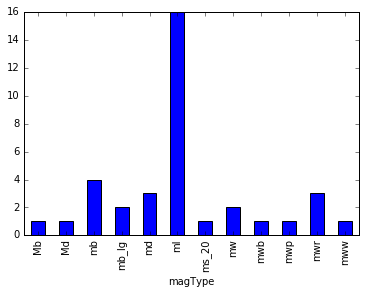

In [119]:
import matplotlib.pyplot as plt, numpy as np
plot = pv2.plot(kind='bar')

Similarly we can analyze the depth trends from the original table. This gives a view of how deep within the earth's crust the earthquakes are likely to occur.

In [162]:

new_table = eq_df[['depth','place','locationSource']]
new_table.describe()


,depth
count,1236.000000
mean,59.862103
std,111.566480
min,-2.000000
25%,10.000000
50%,19.050000
75%,58.050000
max,657.090000


In [163]:
pv3 = eq_df.pivot_table(index="magType", columns="locationSource", aggfunc=len, values = "time")
pv3

locationSource,ak,car,ci,guc,hv,isk,ismp,ld,ldg,lim,...,nn,pgc,pr,rom,se,sko,tul,us,uu,uw
magType,,,,,,,,,,,,,,,,,,,,,
Mb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Md,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mb,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,1,NaN,NaN,NaN,523,NaN,NaN
mb_lg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,64,NaN,NaN
md,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
ml,221,NaN,71,2,14,NaN,1,2,1,NaN,...,4,2,NaN,NaN,NaN,1,36,23,10,6
ms_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
mw,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mwb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN


In [164]:
pv3.sum()

locationSource
ak      221
car       1
ci       78
guc       8
hv       17
isk       1
ismp      1
ld        2
ldg       1
lim       1
mb        5
nc       29
nn        4
pgc       2
pr      149
rom       1
se        1
sko       1
tul      37
us      660
uu       10
uw        6
dtype: float64

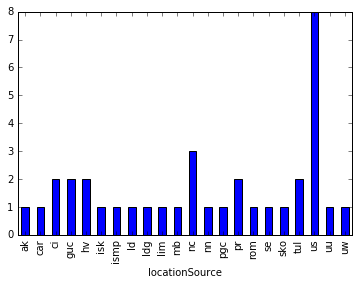

In [168]:
pv3.count().plot(kind='bar')